# reviews xlsx

In [ ]:
import pandas as pd
import numpy as np
import string
import re
import os

# !pip install pyspellchecker
# from spellchecker import SpellChecker

# !pip install symspellpy
from symspellpy import SymSpell, Verbosity

import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords') 

from collections import Counter
from multiprocessing import Pool

# !pip install spacy
import spacy

# !pip install gensim
import gensim
from gensim import corpora

# !pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns

## Import test

In [4]:
folder_path = 'data'
# !pip install openpyxl

all_dataframes = []

# Parcourir tous les fichiers dans le dossier
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_excel(file_path)
        all_dataframes.append(df)


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     -------------------------------------  245.8/250.0 kB 7.4 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 5.1 MB/s eta 0:00:00


In [6]:
all_data = pd.concat(all_dataframes, ignore_index=True)

## Import 

In [3]:
all_data = pd.read_csv('data_scrapped.csv')

## Data info

In [12]:
nan_per_column = all_data.isnull().sum()
nan_per_column

company      17049
stars            0
author           0
date             0
review           1
review_en        1
dtype: int64

In [7]:
all_data

,company,stars,author,date,review,review_en
0,NaN,1,victime,07/08/2022,"Assurance à bannir, 3 ans chez Aviva, j'ai vu ...","Insurance to be banned, 3 years with Aviva, I ..."
1,NaN,1,emma,03/08/2022,J'ai souscrit un perp par l'intermédiaire d'UF...,I took out a perp through UFF with Bee Vie (st...
2,NaN,1,CACO31170,18/07/2022,je ne vous le conseille pas. Depuis janvier 20...,I don't recommend it. Since January 2022 I hav...
3,NaN,2,CLAIRE,13/07/2022,AVIVA devenue ABEILLE ont du mal à régler les ...,AVIVA which became ABEILLE have difficulty set...
4,NaN,1,Emma94,08/07/2022,J'ai fait une demande de rachat d'une assuranc...,I made a request to buy back life insurance on...
...,...,...,...,...,...,...
23583,NaN,4,JEROME H,31/05/2022,"Je suis très satisfait de vos services( Tarif,...","I am very satisfied with your services (price,..."
23584,NaN,4,lara B,31/05/2022,je suis satisfaite du service et des modalités...,I am satisfied with the service and the terms\...
23585,NaN,5,sophie J,31/05/2022,"Je suis à la GMF depuis que j'ai une voiture, ...","I have been at GMF since I had a car, I then t..."
23586,NaN,3,Jean-Paul D,30/05/2022,satisfait des services mais pas du prix sur l'...,satisfied with the services but not with the p...


In [ ]:
all_data[all_data['avis_cor_en'].notnull()][['avis_en','avis_cor_en']]

,avis_en,avis_cor_en
33000,Insurance that puts customers in difficulty. S...,Insurance that puts customers in difficulty. S...
33001,Hello\nMember 3001628. You have sent me a medi...,Hello\nMember 3001628. You have sent me a medi...
33002,I am still waiting for my salary supplement fo...,I am still waiting for my salary supplement fo...
33003,In half treatment the mutual after four reimbu...,In half treatment the mutual after four reimbu...
33004,Notice to colleagues from the territorial publ...,Notice to colleagues from the territorial publ...
...,...,...
33426,Very disappointed with how to proceed with you...,Very disappointed with how to proceed with you...
33427,Pont de Beauvoisin Savoie agency\nIncompetence...,Pont de Beauvoisin Savoie agency\nIncompetence...
33428,hello\nThe assistance is deplorable and the au...,hello\nThe assistance is deplorable and the au...
33429,Hello I subscribed to a damage contract work a...,Hello I subscribed to a damage contract work a...


In [4]:
duplicate_rows = all_data[all_data.duplicated(keep=False)]

In [5]:
duplicate_rows_sorted = duplicate_rows.sort_values(by=list(all_data.columns))

In [6]:
duplicate_rows_sorted

,company,stars,author,date,review,review_en
26218,NaN,1,ALTER EGO,05/11/2020,"Nous avons fait, par erreur, un virement au bé...","We made, by mistake, a transfer to this compan..."
26228,NaN,1,ALTER EGO,05/11/2020,"Nous avons fait, par erreur, un virement au bé...","We made, by mistake, a transfer to this compan..."
26238,NaN,1,ALTER EGO,05/11/2020,"Nous avons fait, par erreur, un virement au bé...","We made, by mistake, a transfer to this compan..."
26248,NaN,1,ALTER EGO,05/11/2020,"Nous avons fait, par erreur, un virement au bé...","We made, by mistake, a transfer to this compan..."
26258,NaN,1,ALTER EGO,05/11/2020,"Nous avons fait, par erreur, un virement au bé...","We made, by mistake, a transfer to this compan..."
...,...,...,...,...,...,...
24689,NaN,5,odile R,12/07/2022,"je suis satisfait de la prise en charge, expli...","I am satisfied with the support, clear explana..."
24723,NaN,5,odile R,12/07/2022,"je suis satisfait de la prise en charge, expli...","I am satisfied with the support, clear explana..."
24757,NaN,5,odile R,12/07/2022,"je suis satisfait de la prise en charge, expli...","I am satisfied with the support, clear explana..."
24791,NaN,5,odile R,12/07/2022,"je suis satisfait de la prise en charge, expli...","I am satisfied with the support, clear explana..."


## Cleaning

In [7]:
# all_data['avis_en'] = all_data['avis_cor_en'].combine_first(all_data['avis_en'])
# all_data['avis'] = all_data['avis_cor'].combine_first(all_data['avis'])

In [8]:
# all_data.drop(['avis_cor', 'avis_cor_en'], axis=1, inplace=True)
# all_data = all_data.dropna(subset=['avis_en'])

In [4]:
all_data = all_data.drop_duplicates()

In [5]:
all_data = all_data.dropna(subset=('review'))

## Spellchecker

In [10]:
all_data.value_counts()

company  stars  author   date        review                                                review_en                                                
MACIF    1      anonyme  02/06/2021  Intervention supprimée à la demande de l'internaute.  Intervention deleted at the request of the Internet user.    1
                         21/02/2020  Intervention supprimée à la demande de l'internaute.  Intervention deleted at the request of the Internet user.    1
Name: count, dtype: int64

In [6]:
nltk.download('stopwords')
stop_words_fr = set(stopwords.words('french'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\minji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
words = all_data['review'].str.split()

In [13]:
words = words.apply(lambda x: [item for item in x if item not in stop_words_fr])
frequent_words = Counter([word for sublist in words for word in sublist])
frequent_words.most_common(10)

[('a', 17017),
 ('Je', 14818),
 ('très', 11185),
 ('plus', 10750),
 ('assurance', 9154),
 ("j'ai", 7892),
 ('prix', 7298),
 ('service', 7129),
 ('bien', 6277),
 ('!', 6143)]

In [8]:
# Initialisation de SymSpell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = "fr-100k.txt"  # Remplacez par le chemin vers votre dictionnaire français
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

True

In [9]:
# Liste des stopwords en français
stop_words = set(stopwords.words('french'))

# Fonction pour le prétraitement du texte
def preprocess_text(text):
    # Suppression des caractères spéciaux et de la ponctuation
    text = re.sub(r'\W', ' ', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Suppression des stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text

# Fonction pour corriger l'orthographe
def spell_check(text):
    text = preprocess_text(text)
    suggestions = sym_spell.lookup_compound(text, max_edit_distance=2)
    return suggestions[0].term

In [10]:
# Création d'un pool de processus
with Pool(processes=4) as pool:  # Utilise 4 processus
    all_data['review_spellcheck'] = pool.map(spell_check, all_data['review'])

## Word frequency

In [8]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
  plt.show()

C:\Users\minji\AppData\Local\Temp\ipykernel_23224\3099976070.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


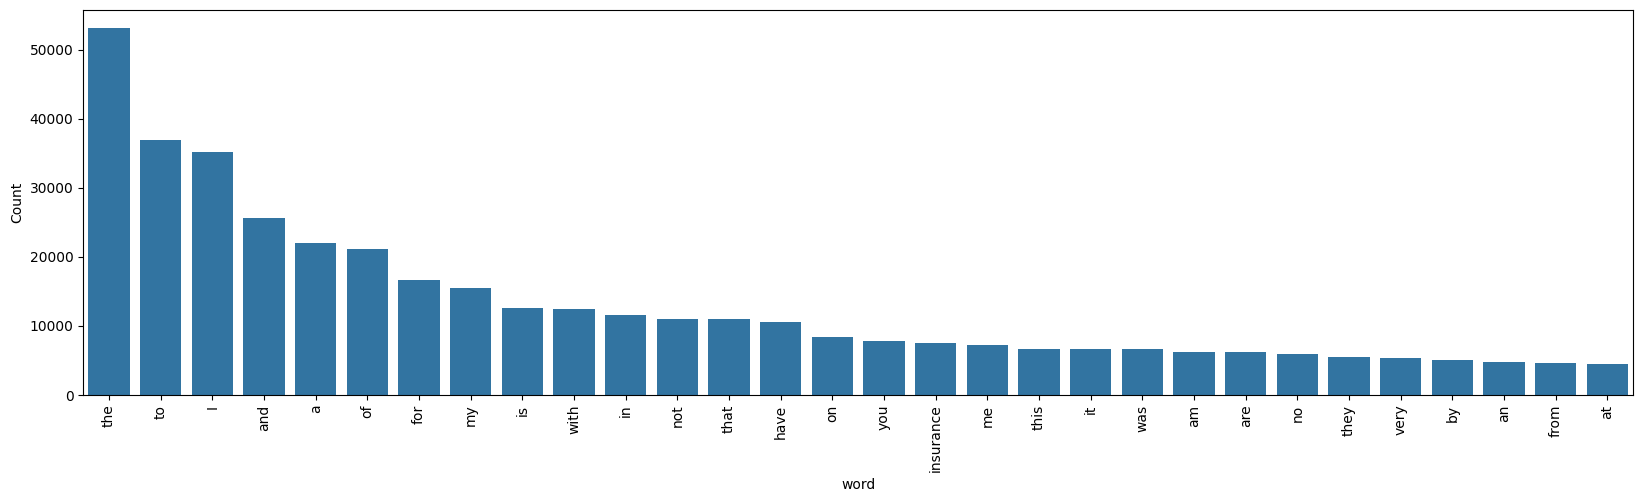

In [9]:
freq_words(all_data['review_en'])

In [10]:
stop_words = stopwords.words('english')
def remove_stopwords(rev):
  rev_new = " ".join([i for i in rev if i not in stop_words])
  return rev_new

In [11]:
reviews_en = all_data['review_en'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
reviews_en = [remove_stopwords(r.split()) for r in reviews_en]
reviews_en = [r.lower() for r in reviews_en]

C:\Users\minji\AppData\Local\Temp\ipykernel_23224\3099976070.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


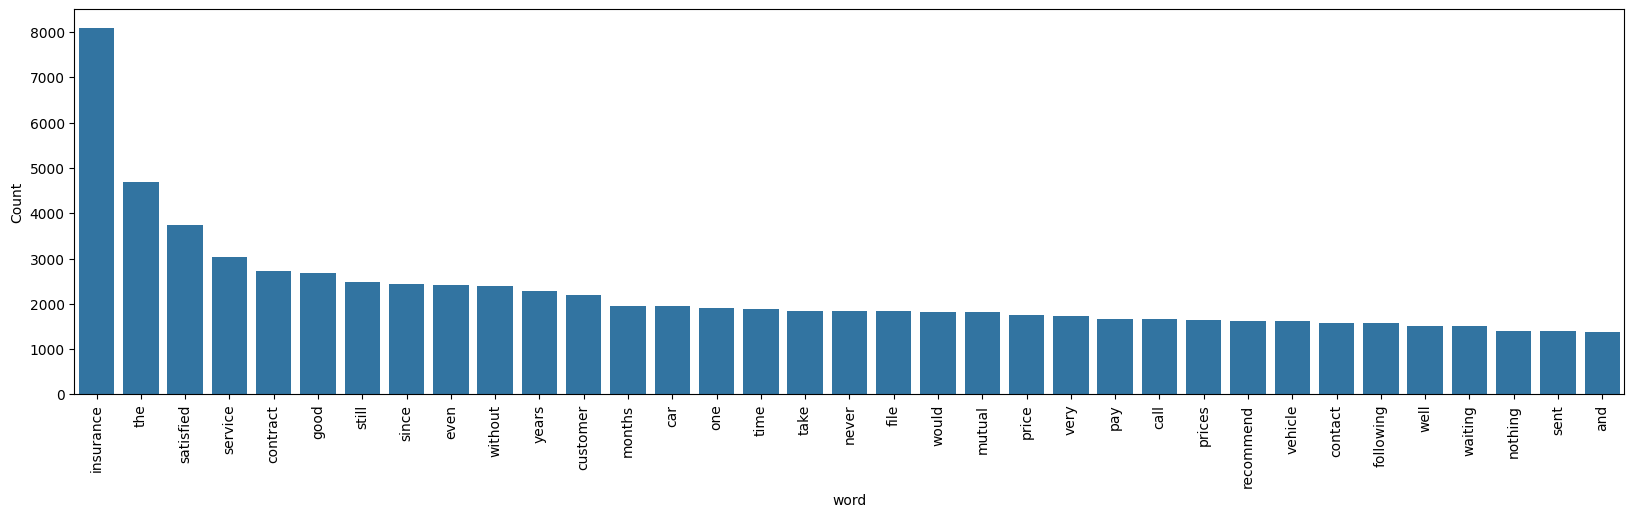

In [12]:
freq_words(reviews_en, 35)

## Topic modeling

In [14]:
# !python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [15]:
def lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [16]:
tokenized_reviews = pd.Series(reviews_en).apply(lambda x: x.split())

In [17]:
tokenized_and_lemmatized_reviews = lemmatization(tokenized_reviews)

In [18]:
reviews_3 = []
for i in range(len(tokenized_and_lemmatized_reviews)):
    reviews_3.append(' '.join(tokenized_and_lemmatized_reviews[i]))

C:\Users\minji\AppData\Local\Temp\ipykernel_23224\3099976070.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


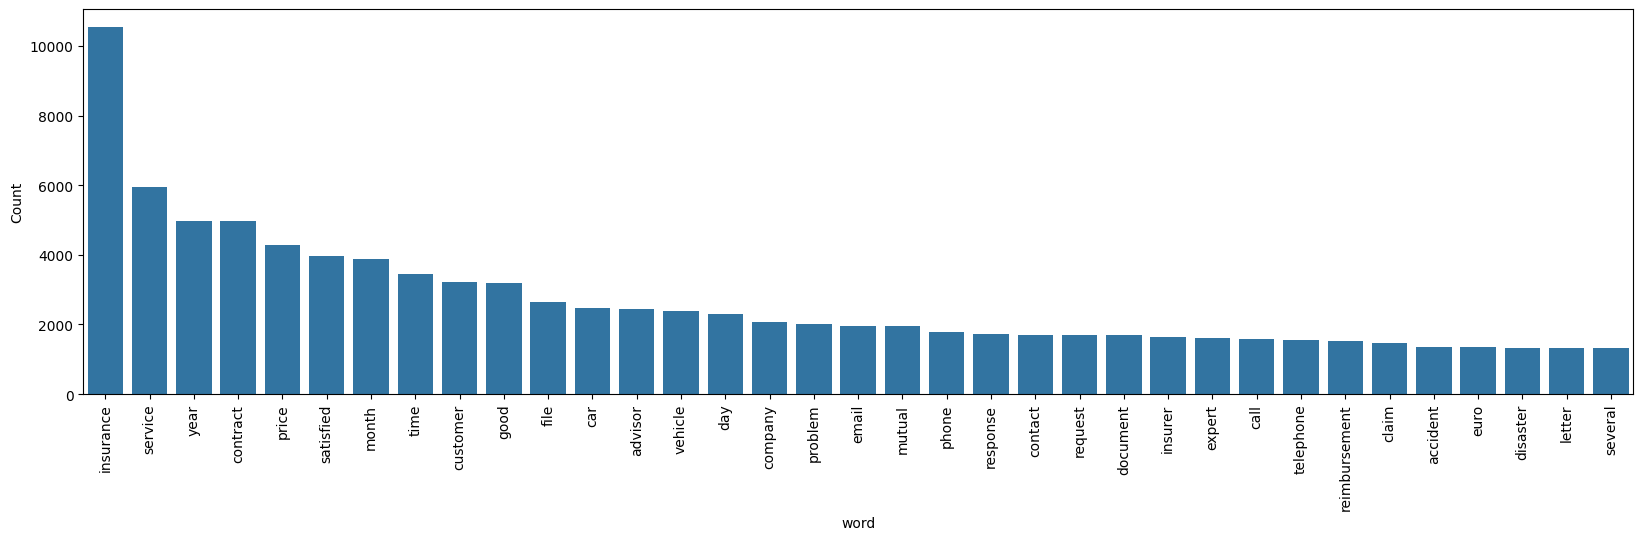

In [19]:
freq_words(reviews_3, 35)

In [20]:
# Create the term dictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(tokenized_and_lemmatized_reviews)
# Convert list of reviews (reviews_2) into a Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_and_lemmatized_reviews]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=7, 
                random_state=100,
                chunksize=1000,
                passes=50)

In [21]:
lda_model.print_topics()

[(0,
  '0.056*"expert" + 0.038*"damage" + 0.030*"disaster" + 0.027*"matmut" + 0.021*"water" + 0.018*"claim" + 0.014*"report" + 0.013*"insurance" + 0.013*"work" + 0.012*"year"'),
 (1,
  '0.023*"pension" + 0.023*"contract" + 0.022*"month" + 0.018*"year" + 0.017*"letter" + 0.016*"insurance" + 0.015*"payment" + 0.014*"malakoff" + 0.013*"document" + 0.013*"company"'),
 (2,
  '0.091*"satisfied" + 0.089*"service" + 0.083*"price" + 0.041*"insurance" + 0.030*"good" + 0.017*"simple" + 0.016*"customer" + 0.016*"contract" + 0.015*"quick" + 0.012*"easy"'),
 (3,
  '0.068*"advisor" + 0.039*"good" + 0.038*"friendly" + 0.033*"efficient" + 0.026*"professional" + 0.022*"attentive" + 0.020*"welcome" + 0.020*"phone" + 0.019*"clear" + 0.019*"person"'),
 (4,
  '0.085*"mutual" + 0.058*"reimbursement" + 0.031*"month" + 0.031*"insurance" + 0.026*"health" + 0.022*"company" + 0.016*"time" + 0.015*"request" + 0.014*"staff" + 0.012*"refund"'),
 (5,
  '0.052*"insurance" + 0.037*"year" + 0.022*"contract" + 0.021*"veh

In [22]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.116130  0.005375       1        1  28.752295
6      0.057466  0.119518       2        1  18.295391
1     -0.129022  0.136713       3        1  15.968434
2      0.148478  0.117872       4        1  14.685836
4     -0.147294  0.070407       5        1   8.441151
0     -0.167109 -0.313697       6        1   7.987345
3      0.353610 -0.136188       7        1   5.869548, topic_info=                Term         Freq        Total Category  logprob  loglift
196        satisfied  4256.000000  4256.000000  Default  30.0000  30.0000
76           service  6155.000000  6155.000000  Default  29.0000  29.0000
323            price  3850.000000  3850.000000  Default  28.0000  28.0000
442           mutual  2281.000000  2281.000000  Default  27.0000  27.0000
2            advisor  2241.000000  2241.000000  Default  26.0000  26.0000
..               ...          ...          ...      ...      ...      ...
136  professionalism   160.497646   354.232786   Topic7  -4.7532   2.0437
485           answer   207.516673   782.386640   Topic7  -4.4963   1.5083
31         telephone   219.437545  1709.076638   Topic7  -4.4404   0.7828
381          support   155.931477   594.772553   Topic7  -4.7821   1.4966
15       information   153.545850  1190.099289   Topic7  -4.7975   0.7876

[430 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
87        1  0.870728     %
87        3  0.128939     %
0         1  0.615984     -
0         2  0.095303     -
0         3  0.259178     -
...     ...       ...   ...
36        1  0.697419  year
36        3  0.188795  year
36        4  0.049597  year
36        6  0.064088  year
203       1  0.995513     €

[610 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 2, 3, 5, 1, 4])

In [25]:
# Extract topics from lda_model
topics = lda_model.print_topics()

def name_topics(topics, num_words=3):
    topic_names = []
    for topic in topics:
        # Extract words from each topic string
        words = re.findall(r'"([^"]*)"', topic[1])
        # Use the top num_words words to name the topic
        topic_names.append('_'.join(words[:num_words]))
    return topic_names

# Use the function
topic_names = name_topics(topics)
for i, name in enumerate(topic_names):
    print(f"Topic {i}: {name}")

Topic 0: expert_damage_disaster
Topic 1: pension_contract_month
Topic 2: satisfied_service_price
Topic 3: advisor_good_friendly
Topic 4: mutual_reimbursement_month
Topic 5: insurance_year_contract
Topic 6: file_service_time
